In [1]:
import math
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv ('CSI_6_ARI_CW_23_24_25.csv')

In [3]:
print(f"Dataset Shape: {df.shape}")
print(f"Number Of Rows: {df.shape[0]}")
print(f"Number Of Columns: {df.shape[1]}")

Dataset Shape: (30000, 25)
Number Of Rows: 30000
Number Of Columns: 25


In [4]:
df.head()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98813062,1,good,Green Car,good,good,Convinient,excellent,excellent,excellent,...,good,excellent,Female,Loyal Customer,47.0,Personal Travel,Eco,721,0.0,4.0
1,98871729,0,acceptable,Ordinary,acceptable,acceptable,Convinient,excellent,acceptable,excellent,...,good,excellent,Female,disloyal Customer,9.0,Business travel,Eco,2950,38.0,28.0
2,98893437,1,acceptable,Green Car,acceptable,NaN,manageable,good,good,excellent,...,excellent,good,Female,Loyal Customer,34.0,Business travel,Business,871,0.0,0.0
3,98860750,0,poor,Ordinary,poor,poor,need improvement,excellent,poor,excellent,...,excellent,excellent,Male,disloyal Customer,39.0,NaN,Business,1768,0.0,0.0
4,98803703,0,acceptable,Ordinary,acceptable,acceptable,manageable,acceptable,acceptable,acceptable,...,acceptable,acceptable,Female,Loyal Customer,31.0,Business travel,Eco,2812,0.0,0.0


In [5]:
df.drop('ID', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall_Experience       30000 non-null  int64  
 1   Seat_comfort             29985 non-null  object 
 2   Seat_Class               30000 non-null  object 
 3   Arrival_time_convenient  27198 non-null  object 
 4   Catering                 27240 non-null  object 
 5   Platform_location        29991 non-null  object 
 6   Onboardwifi_service      29991 non-null  object 
 7   Onboard_entertainment    29994 non-null  object 
 8   Online_support           29982 non-null  object 
 9   Onlinebooking_Ease       29988 non-null  object 
 10  Onboard_service          27621 non-null  object 
 11  Leg_room                 29975 non-null  object 
 12  Baggage_handling         29955 non-null  object 
 13  Checkin_service          29978 non-null  object 
 14  Cleanliness           

In [7]:
missing_values_count = df.isnull().sum()

# Calculate the percentage of missing values per column
total_rows = len(df)
missing_values_percentage = (missing_values_count / total_rows) * 100

# Format the percentage of missing values
missing_values_percentage_formatted = missing_values_percentage.apply(lambda x: "{:.2f}%".format(x))

# Display the count and percentage of missing values for each column
missing_values_info = pd.DataFrame({
    'Count': missing_values_count,
    'Percentage': missing_values_percentage_formatted
})

print(missing_values_info)

# Print total missing values
total_missing_values = missing_values_count.sum()
print(f"\nTotal Missing values: {total_missing_values}")

# Calculate and print the overall percentage of missing values in the DataFrame
total_values = total_rows * len(df.columns)
overall_missing_percentage = (total_missing_values / total_values) * 100
print(f"Overall Percentage of Missing Values: {overall_missing_percentage:.2f}%")

                         Count Percentage
Overall_Experience           0      0.00%
Seat_comfort                15      0.05%
Seat_Class                   0      0.00%
Arrival_time_convenient   2802      9.34%
Catering                  2760      9.20%
Platform_location            9      0.03%
Onboardwifi_service          9      0.03%
Onboard_entertainment        6      0.02%
Online_support              18      0.06%
Onlinebooking_Ease          12      0.04%
Onboard_service           2379      7.93%
Leg_room                    25      0.08%
Baggage_handling            45      0.15%
Checkin_service             22      0.07%
Cleanliness                  2      0.01%
Online_boarding              2      0.01%
Gender                      23      0.08%
CustomerType              2861      9.54%
Age                         10      0.03%
TypeTravel                2936      9.79%
Travel_Class                 0      0.00%
Travel_Distance              0      0.00%
DepartureDelay_in_Mins      16    

In [8]:
def identify_imbalanced_classes_for_all(df, threshold_percentage=10.0):
    
    # Identify categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    RED = '\033[91m'
    RESET = '\033[0m'
    for column in categorical_columns:
        # Calculate the frequency of each class
        class_counts = df[column].value_counts(normalize=True) * 100
        
        # Identify classes where the percentage is below the threshold
        imbalanced_classes = class_counts[class_counts < threshold_percentage]
        
        # Output the imbalanced classes
        if not imbalanced_classes.empty:
            print(f"Imbalanced classes in {RED}'{column}'{RESET} below {threshold_percentage}%:")
            # Formatting the output to exclude 'Name' and 'dtype'
            for class_name, proportion in imbalanced_classes.items():
                print(f"{class_name}: {proportion:.2f}%")
            print()

identify_imbalanced_classes_for_all(df, 10)  # Adjust the threshold as necessary

Imbalanced classes in 'Seat_comfort' below 10%:
extremely poor: 3.67%

Imbalanced classes in 'Arrival_time_convenient' below 10%:
extremely poor: 4.98%

Imbalanced classes in 'Catering' below 10%:
extremely poor: 4.59%

Imbalanced classes in 'Onboardwifi_service' below 10%:
extremely poor: 0.07%

Imbalanced classes in 'Onboard_entertainment' below 10%:
poor: 9.12%
extremely poor: 2.33%

Imbalanced classes in 'Online_support' below 10%:
extremely poor: 0.00%

Imbalanced classes in 'Onlinebooking_Ease' below 10%:
extremely poor: 0.02%

Imbalanced classes in 'Onboard_service' below 10%:
extremely poor: 0.01%

Imbalanced classes in 'Leg_room' below 10%:
poor: 8.75%
extremely poor: 0.31%

Imbalanced classes in 'Baggage_handling' below 10%:
poor: 6.00%

Imbalanced classes in 'Checkin_service' below 10%:
extremely poor: 0.00%

Imbalanced classes in 'Cleanliness' below 10%:
poor: 6.03%
extremely poor: 0.01%

Imbalanced classes in 'Online_boarding' below 10%:
extremely poor: 0.01%



C:\Users\frosty\AppData\Local\Temp\ipykernel_7236\2211828000.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


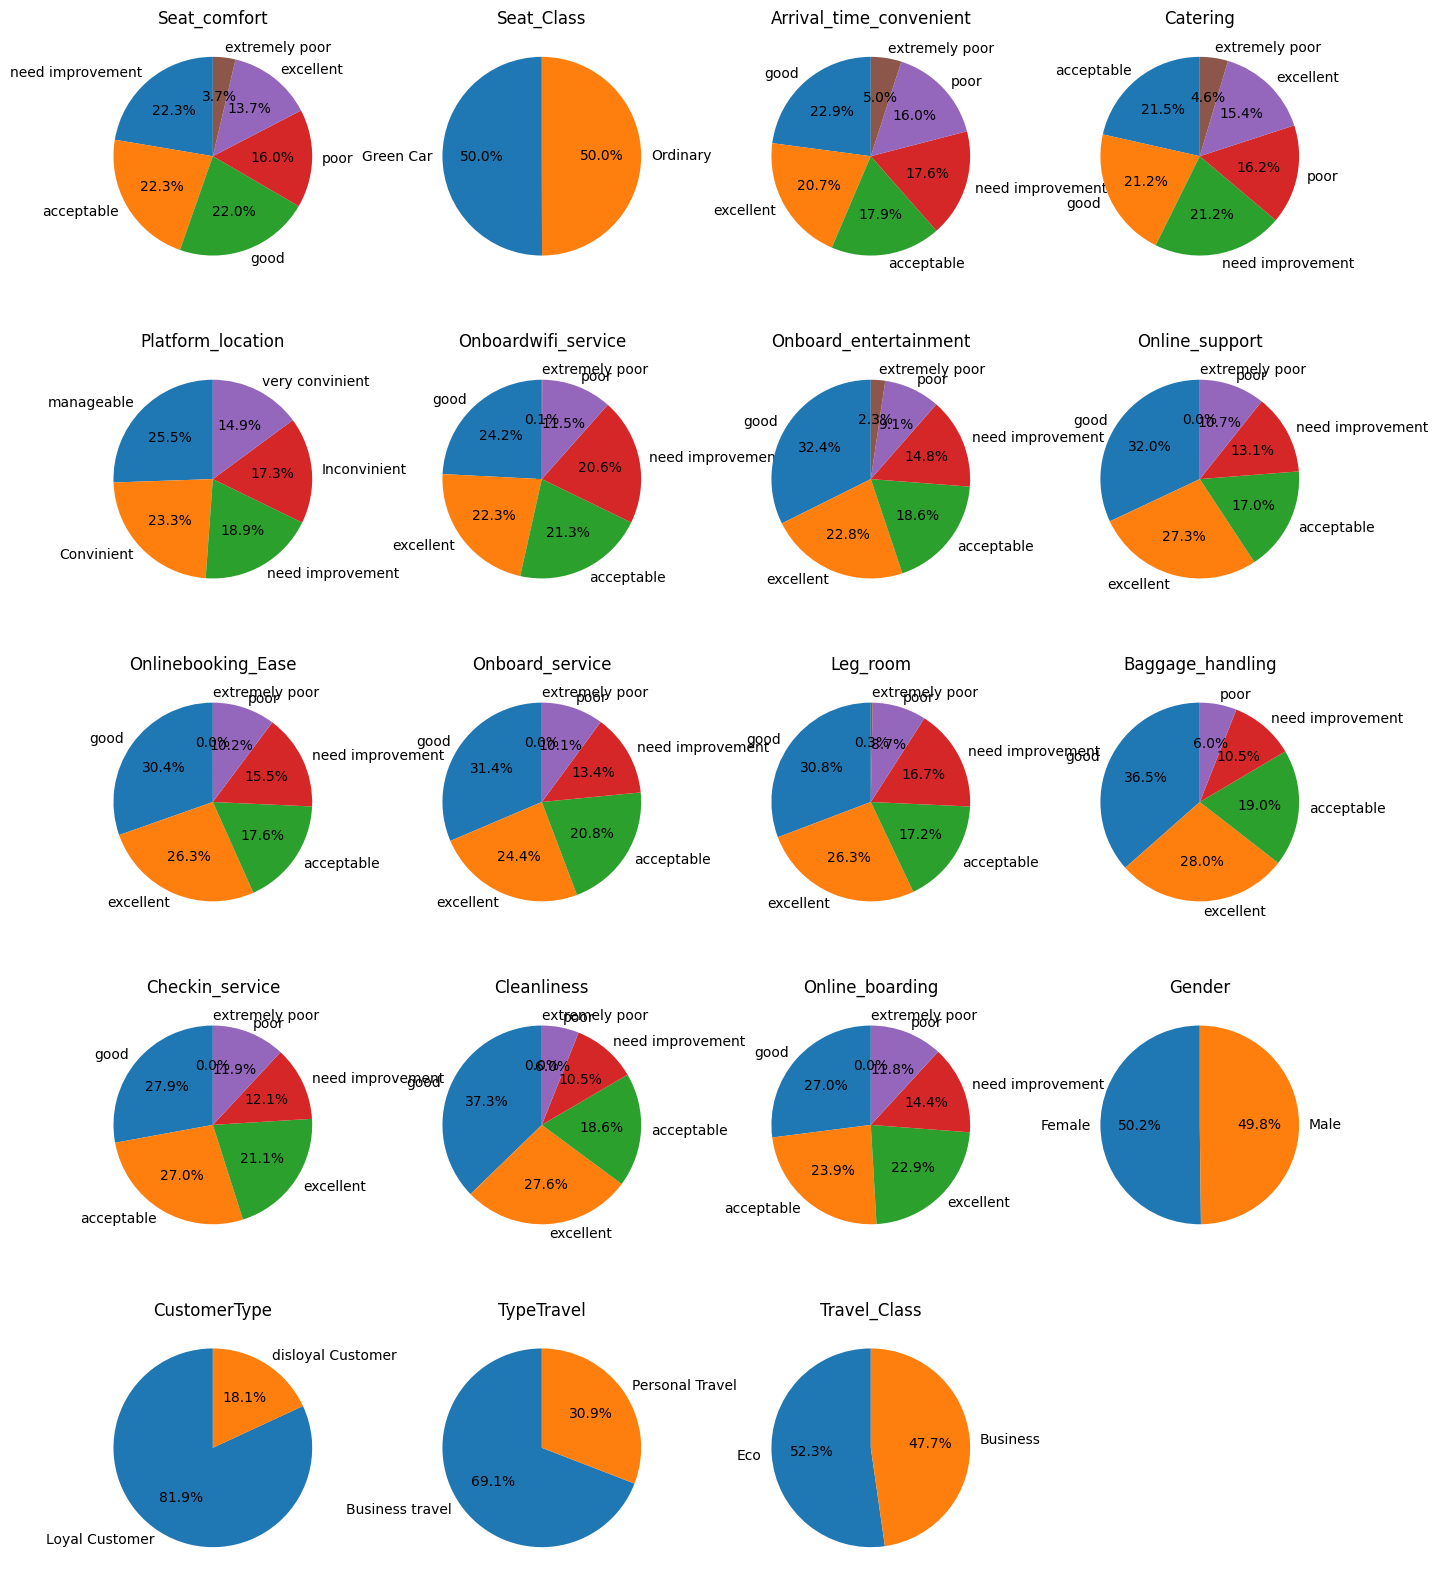

In [9]:
def plot_pie_charts(df, charts_per_row=4):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    num_cols = len(categorical_columns)
    num_rows = -(-num_cols // charts_per_row)  # Ceiling division to get number of rows needed
    
    # Adjust subplot spacing
    fig, axes = plt.subplots(num_rows, charts_per_row, figsize=(charts_per_row * 4, num_rows * 4), gridspec_kw={'hspace': 0.3, 'wspace': 0.3})
    
    # If there's only one row, axes is a 1D array
    if num_cols <= charts_per_row:
        axes = [axes]
    
    for i, col in enumerate(categorical_columns):
        ax = axes[i // charts_per_row, i % charts_per_row]
        category_counts = df[col].value_counts()
        ax.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(col)

    # If there are empty subplots, hide them
    for j in range(num_cols, num_rows * charts_per_row):
        if num_rows > 1:
            axes[j // charts_per_row, j % charts_per_row].axis('off')
        else:
            axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_pie_charts(df, charts_per_row=4)


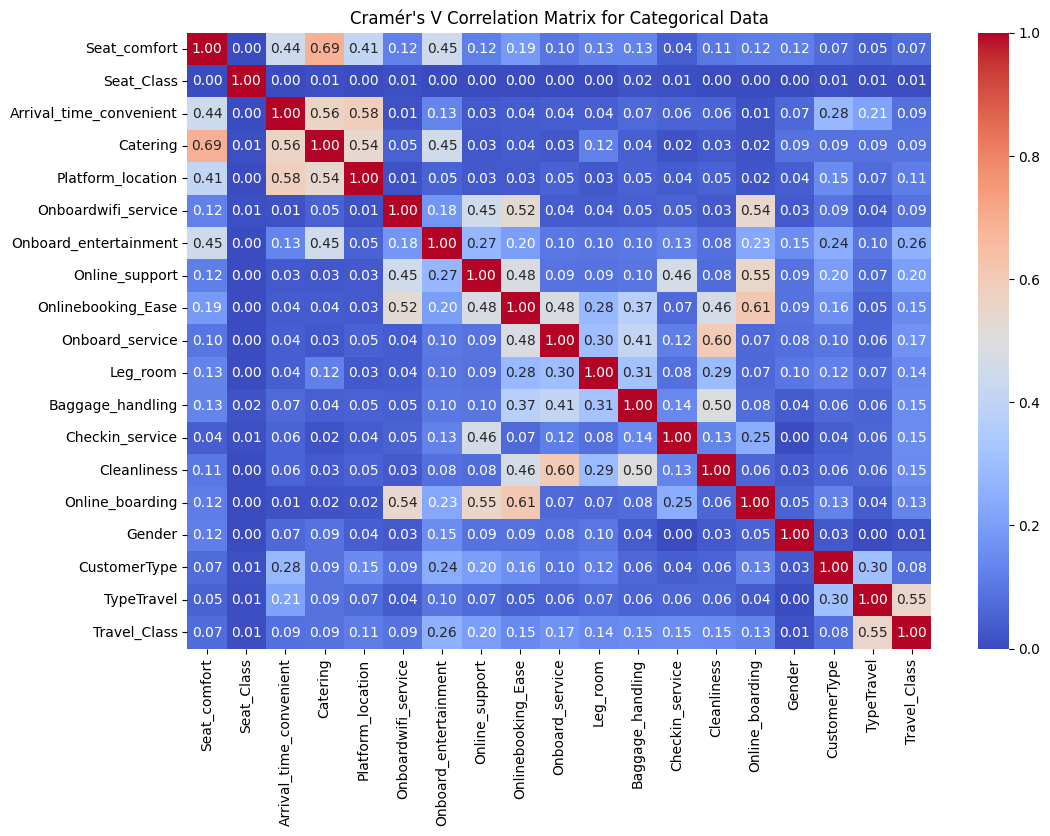

In [10]:
#use of Cramér's V as it provides a straightforward interpretation similar to the Pearson correlation.
# function to compute Cramér's V based on the chi-squared statistic from the contingency table.


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

# Apply Cramér's V for each pair of categorical variables
categorical_df = df.select_dtypes(include=['object'])
correlations = pd.DataFrame(index=categorical_df.columns, columns=categorical_df.columns)

for col1 in categorical_df.columns:
    for col2 in categorical_df.columns:
        correlations.loc[col1, col2] = cramers_v(categorical_df[col1], categorical_df[col2])

correlations = correlations.astype(float)

# Plotting the heatmap for Cramér's V correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Cramér\'s V Correlation Matrix for Categorical Data')
plt.show()


In [11]:
from sklearn.impute import SimpleImputer

# Assuming df is your original DataFrame

# Initialize the imputer
imputer = SimpleImputer(strategy='most_frequent')

# Create a new DataFrame to hold the imputed values with original data types preserved
df_imputed = df.copy()

# Impute each column separately to preserve the data type
for column in df.columns:
    # Reshape df[column] to fit imputer input requirement, which is 2D
    col_values = df[column].values.reshape(-1, 1)
    # Impute the missing values
    imputed_data = imputer.fit_transform(col_values)
    # Flatten the array and preserve original data type
    df_imputed[column] = pd.Series(imputed_data.flatten(), index=df.index).astype(df[column].dtype)

# Check if any nulls remain
nulls_after_imputation = df_imputed.isnull().sum()

# Override df with the imputed DataFrame
df = df_imputed

# Check if the imputation was successful
print(nulls_after_imputation)


Overall_Experience         0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
Gender                     0
CustomerType               0
Age                        0
TypeTravel                 0
Travel_Class               0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
dtype: int64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Overall_Experience       30000 non-null  int64  
 1   Seat_comfort             30000 non-null  object 
 2   Seat_Class               30000 non-null  object 
 3   Arrival_time_convenient  30000 non-null  object 
 4   Catering                 30000 non-null  object 
 5   Platform_location        30000 non-null  object 
 6   Onboardwifi_service      30000 non-null  object 
 7   Onboard_entertainment    30000 non-null  object 
 8   Online_support           30000 non-null  object 
 9   Onlinebooking_Ease       30000 non-null  object 
 10  Onboard_service          30000 non-null  object 
 11  Leg_room                 30000 non-null  object 
 12  Baggage_handling         30000 non-null  object 
 13  Checkin_service          30000 non-null  object 
 14  Cleanliness           

In [14]:
df.head()

,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,True,good,Green Car,good,good,Convinient,excellent,excellent,excellent,excellent,...,good,excellent,Female,Loyal Customer,47.0,Personal Travel,Eco,721,0.0,4.0
1,False,acceptable,Ordinary,acceptable,acceptable,Convinient,excellent,acceptable,excellent,excellent,...,good,excellent,Female,disloyal Customer,9.0,Business travel,Eco,2950,38.0,28.0
2,True,acceptable,Green Car,acceptable,acceptable,manageable,good,good,excellent,excellent,...,excellent,good,Female,Loyal Customer,34.0,Business travel,Business,871,0.0,0.0
3,False,poor,Ordinary,poor,poor,need improvement,excellent,poor,excellent,excellent,...,excellent,excellent,Male,disloyal Customer,39.0,Business travel,Business,1768,0.0,0.0
4,False,acceptable,Ordinary,acceptable,acceptable,manageable,acceptable,acceptable,acceptable,acceptable,...,acceptable,acceptable,Female,Loyal Customer,31.0,Business travel,Eco,2812,0.0,0.0


In [16]:
import pandas as pd

# Assuming df is your DataFrame
# Convert ID and Travel_Distance directly to native Python int type
df['Travel_Distance'] = df['Travel_Distance'].astype(int)
# Convert Age, DepartureDelay_in_Mins, and ArrivalDelay_in_Mins to native Python int type
df['Age'] = df['Age'].astype(int)
df['DepartureDelay_in_Mins'] = df['DepartureDelay_in_Mins'].round().astype(int)
df['ArrivalDelay_in_Mins'] = df['ArrivalDelay_in_Mins'].round().astype(int)

# Convert Overall_Experience from int to binary (boolean)
df['Overall_Experience'] = df['Overall_Experience'].astype(bool)

# Convert object columns to categorical
categorical_columns = [
    'Seat_comfort', 'Arrival_time_convenient', 'Catering', 'Platform_location',
    'Onboardwifi_service', 'Onboard_entertainment', 'Online_support', 
    'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling', 
    'Checkin_service', 'Cleanliness', 'Online_boarding', 'CustomerType'
]

for col in categorical_columns:
    df[col] = df[col].astype('category')

# Convert binary columns with explicit mapping to boolean
binary_columns_with_mapping = {
    'Seat_Class': {'Green Car': True, 'Ordinary': False},
    'Gender': {'Female': False, 'Male': True},
    'TypeTravel': {'Personal Travel': False, 'Business travel': True},
    'Travel_Class': {'Eco': False, 'Business': True}
}

for col, mapping in binary_columns_with_mapping.items():
    df[col] = df[col].map(mapping).astype(bool)



In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Overall_Experience       30000 non-null  bool    
 1   Seat_comfort             30000 non-null  category
 2   Seat_Class               30000 non-null  bool    
 3   Arrival_time_convenient  30000 non-null  category
 4   Catering                 30000 non-null  category
 5   Platform_location        30000 non-null  category
 6   Onboardwifi_service      30000 non-null  category
 7   Onboard_entertainment    30000 non-null  category
 8   Online_support           30000 non-null  category
 9   Onlinebooking_Ease       30000 non-null  category
 10  Onboard_service          30000 non-null  category
 11  Leg_room                 30000 non-null  category
 12  Baggage_handling         30000 non-null  category
 13  Checkin_service          30000 non-null  category
 14  Cleanl

In [15]:
df.describe()

,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,39.422633,1980.855000,14.955533,15.193767
std,15.116685,1031.359206,38.260932,38.312071
min,7.000000,50.000000,0.000000,0.000000
25%,27.000000,1360.000000,0.000000,0.000000
50%,40.000000,1925.000000,0.000000,0.000000
75%,51.000000,2540.000000,13.000000,13.000000
max,85.000000,6948.000000,1017.000000,1011.000000


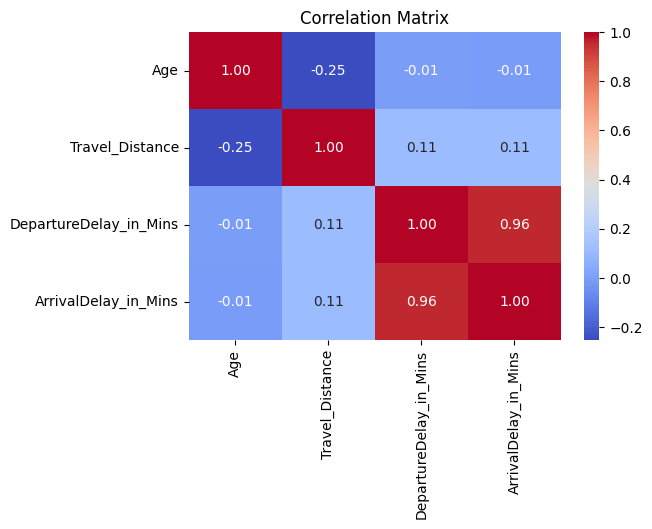

In [17]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Add title
plt.title('Correlation Matrix')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

# 'Overall_Experience' is the column that indicates if the customer is satisfied (1) or not (0)
X = df.drop(['Overall_Experience'], axis=1)  # Drop  column to avoid data leakage
y = df['Overall_Experience']  # Use the column indicating satisfaction as the target

# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
X_train.head()

,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,...,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
21753,poor,Green Car,poor,poor,Inconvinient,good,good,good,good,excellent,...,need improvement,good,Male,Loyal Customer,22,Business travel,Business,3702,7,38
251,good,Green Car,good,acceptable,manageable,need improvement,good,poor,good,good,...,good,need improvement,Female,Loyal Customer,27,Personal Travel,Eco,2394,6,10
22941,good,Green Car,excellent,excellent,manageable,excellent,excellent,excellent,excellent,need improvement,...,need improvement,excellent,Male,disloyal Customer,47,Business travel,Eco,2126,0,0
618,excellent,Ordinary,excellent,excellent,very convinient,acceptable,excellent,good,excellent,excellent,...,excellent,acceptable,Male,Loyal Customer,42,Business travel,Business,3408,8,0
17090,need improvement,Ordinary,excellent,need improvement,manageable,excellent,need improvement,poor,excellent,poor,...,need improvement,excellent,Male,Loyal Customer,20,Personal Travel,Eco,2902,0,0


In [20]:
import pandas as pd

# Apply one-hot encoding to categorical columns in both X_train and X_test
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=False)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=False)

# Ensure consistency in columns between X_train and X_test
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
X_train.head()


,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort_acceptable,Seat_comfort_excellent,Seat_comfort_extremely poor,Seat_comfort_good,Seat_comfort_need improvement,Seat_comfort_poor,...,Online_boarding_need improvement,Online_boarding_poor,CustomerType_Loyal Customer,CustomerType_disloyal Customer,TypeTravel_Business travel,TypeTravel_Personal Travel,Travel_Class_Business,Travel_Class_Eco,Gender_Female,Gender_Male
21753,22,3702,7,38,False,False,False,False,False,True,...,False,False,True,False,True,False,True,False,False,True
251,27,2394,6,10,False,False,False,True,False,False,...,True,False,True,False,False,True,False,True,True,False
22941,47,2126,0,0,False,False,False,True,False,False,...,False,False,False,True,True,False,False,True,False,True
618,42,3408,8,0,False,True,False,False,False,False,...,False,False,True,False,True,False,True,False,False,True
17090,20,2902,0,0,False,False,False,False,True,False,...,False,False,True,False,False,True,False,True,False,True


In [21]:
# #minmax
# from sklearn.preprocessing import MinMaxScaler


# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Fit the scaler on the training data and transform it
# X_train_numerical = X_train.select_dtypes(include=['number'])  # Select only numerical columns
# X_test_numerical = X_test.select_dtypes(include=['number'])  # Select only numerical columns

# X_train_normalized = scaler.fit_transform(X_train_numerical)
# X_test_normalized = scaler.transform(X_test_numerical)


In [22]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_columns_train = X_train.select_dtypes(include=['number']).columns
numerical_columns_test = X_test.select_dtypes(include=['number']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform numerical columns only
X_train[numerical_columns_train] = scaler.fit_transform(X_train[numerical_columns_train])

# Transform the test data using the scaler fitted on the training data
X_test[numerical_columns_test] = scaler.transform(X_test[numerical_columns_test])

In [23]:
# from sklearn.preprocessing import OrdinalEncoder
# import pandas as pd

# custom_order = {
#     'Seat_comfort': ['extremely poor', 'poor', 'need improvement', 'acceptable', 'good', 'excellent'],
#     'Arrival_time_convenient': ['extremely poor', 'poor', 'need improvement', 'acceptable', 'good', 'excellent'],
#     'Catering': ['extremely poor', 'poor', 'need improvement', 'acceptable', 'good', 'excellent'],
#     'Platform_location': ['Inconvinient', 'manageable', 'need improvement', 'Convinient', 'very convinient'],
#     'Onboardwifi_service': ['extremely poor', 'poor', 'need improvement', 'acceptable', 'good', 'excellent'],
#     'Onboard_entertainment': ['extremely poor', 'poor', 'need improvement', 'acceptable', 'good', 'excellent'],
#     'Online_support': ['extremely poor', 'poor', 'need improvement', 'acceptable', 'good', 'excellent'],
#     'Onlinebooking_Ease': ['extremely poor', 'poor', 'need improvement', 'acceptable', 'good', 'excellent'],
#     'Onboard_service': ['extremely poor', 'poor', 'need improvement', 'acceptable', 'good', 'excellent'],
#     'Leg_room': ['extremely poor', 'poor', 'need improvement', 'acceptable', 'good', 'excellent'],
#     'Baggage_handling': ['poor', 'need improvement', 'acceptable', 'good', 'excellent'],
#     'Checkin_service': ['extremely poor', 'poor', 'need improvement', 'acceptable', 'good', 'excellent'],
#     'Cleanliness': ['extremely poor', 'poor', 'need improvement', 'acceptable', 'good', 'excellent'],
#     'Online_boarding': ['extremely poor', 'poor', 'need improvement', 'acceptable', 'good', 'excellent'],
#     'Seat_Class': ['Ordinary', 'Green Car'],  # Custom order for the "Class" column
#     'CustomerType': ['disloyal Customer', 'Loyal Customer'],  # Custom order for the "CustomerType" column
#     'TypeTravel': ['Business travel', 'Personal Travel'],  # Custom order for the "TypeTravel" column
#     'Travel_Class': ['Eco', 'Business']  # Custom order for the "Travel_Class" column
# }

# # Initialize OrdinalEncoder with custom order
# ordinal_encoder = OrdinalEncoder(categories=[custom_order[col] for col in custom_order.keys()])
# ordinal_columns = list(custom_order.keys())  # Define ordinal columns

# X_train[ordinal_columns] = ordinal_encoder.fit_transform(X_train[ordinal_columns])  # Encode ordinal columns
# X_test[ordinal_columns] = ordinal_encoder.transform(X_test[ordinal_columns])  # Encode ordinal columns

# # One-hot encode non-ordinal columns
# non_ordinal_columns = ['Gender']
# X_train = pd.get_dummies(X_train, columns=non_ordinal_columns, drop_first=True)
# X_test = pd.get_dummies(X_test, columns=non_ordinal_columns, drop_first=True)


In [24]:
X_train.head()

,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort_acceptable,Seat_comfort_excellent,Seat_comfort_extremely poor,Seat_comfort_good,Seat_comfort_need improvement,Seat_comfort_poor,...,Online_boarding_need improvement,Online_boarding_poor,CustomerType_Loyal Customer,CustomerType_disloyal Customer,TypeTravel_Business travel,TypeTravel_Personal Travel,Travel_Class_Business,Travel_Class_Eco,Gender_Female,Gender_Male
21753,-1.150529,1.680740,-0.208164,0.591238,False,False,False,False,False,True,...,False,False,True,False,True,False,True,False,False,True
251,-0.820052,0.408158,-0.234149,-0.136757,False,False,False,True,False,False,...,True,False,True,False,False,True,False,True,True,False
22941,0.501853,0.147415,-0.390061,-0.396755,False,False,False,True,False,False,...,False,False,False,True,True,False,False,True,False,True
618,0.171377,1.394701,-0.182179,-0.396755,False,True,False,False,False,False,...,False,False,True,False,True,False,True,False,False,True
17090,-1.282719,0.902402,-0.390061,-0.396755,False,False,False,False,True,False,...,False,False,True,False,False,True,False,True,False,True


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Overall_Experience       30000 non-null  bool    
 1   Seat_comfort             30000 non-null  category
 2   Seat_Class               30000 non-null  category
 3   Arrival_time_convenient  30000 non-null  category
 4   Catering                 30000 non-null  category
 5   Platform_location        30000 non-null  category
 6   Onboardwifi_service      30000 non-null  category
 7   Onboard_entertainment    30000 non-null  category
 8   Online_support           30000 non-null  category
 9   Onlinebooking_Ease       30000 non-null  category
 10  Onboard_service          30000 non-null  category
 11  Leg_room                 30000 non-null  category
 12  Baggage_handling         30000 non-null  category
 13  Checkin_service          30000 non-null  category
 14  Cleanl

PREP

In [26]:
from sklearn.metrics import (accuracy_score, roc_curve, auc, confusion_matrix,
                             precision_score, recall_score, f1_score,
                             precision_recall_curve, average_precision_score)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_model(classifier, X_train, y_train, X_test, y_test):
    # Fit model
    model = classifier.fit(X_train, y_train)
    
    # Predicting class labels for the test set
    y_pred = model.predict(X_test)
    
    # Getting decision scores or probabilities, as applicable
    if hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    elif hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        # For models that do not have decision_function or predict_proba
        # As a fallback, use predict itself, note: this is not ideal for ROC AUC
        y_scores = y_pred
    
    # Metrics Calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    # Plotting
    plt.figure(figsize=(12, 4))

    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.subplot(1, 3, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    ap_score = average_precision_score(y_test, y_scores)
    plt.subplot(1, 3, 2)
    plt.step(recall, precision, where='post', label=f'AP Score: {ap_score:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(1, 3, 3)
    sns.heatmap(cm, annot=True, fmt="d", cbar=False, cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')

    plt.tight_layout()
    plt.show()


In [27]:
X_train

,Age,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort_acceptable,Seat_comfort_excellent,Seat_comfort_extremely poor,Seat_comfort_good,Seat_comfort_need improvement,Seat_comfort_poor,...,Online_boarding_need improvement,Online_boarding_poor,CustomerType_Loyal Customer,CustomerType_disloyal Customer,TypeTravel_Business travel,TypeTravel_Personal Travel,Travel_Class_Business,Travel_Class_Eco,Gender_Female,Gender_Male
21753,-1.150529,1.680740,-0.208164,0.591238,False,False,False,False,False,True,...,False,False,True,False,True,False,True,False,False,True
251,-0.820052,0.408158,-0.234149,-0.136757,False,False,False,True,False,False,...,True,False,True,False,False,True,False,True,True,False
22941,0.501853,0.147415,-0.390061,-0.396755,False,False,False,True,False,False,...,False,False,False,True,True,False,False,True,False,True
618,0.171377,1.394701,-0.182179,-0.396755,False,True,False,False,False,False,...,False,False,True,False,True,False,True,False,False,True
17090,-1.282719,0.902402,-0.390061,-0.396755,False,False,False,False,True,False,...,False,False,True,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,-0.159100,-1.850966,2.078542,1.917227,True,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,True
5390,0.435758,-1.653463,-0.390061,-0.396755,False,True,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False
860,0.898425,-1.138787,-0.390061,-0.396755,False,False,False,False,True,False,...,False,False,True,False,True,False,True,False,False,True
15795,-0.093004,0.043313,-0.182179,0.123241,False,False,False,False,True,False,...,False,False,False,True,True,False,False,True,False,True


Discriminant Analysis

Accuracy: 0.89
Precision: 0.90
Recall: 0.90
F1 Score: 0.90


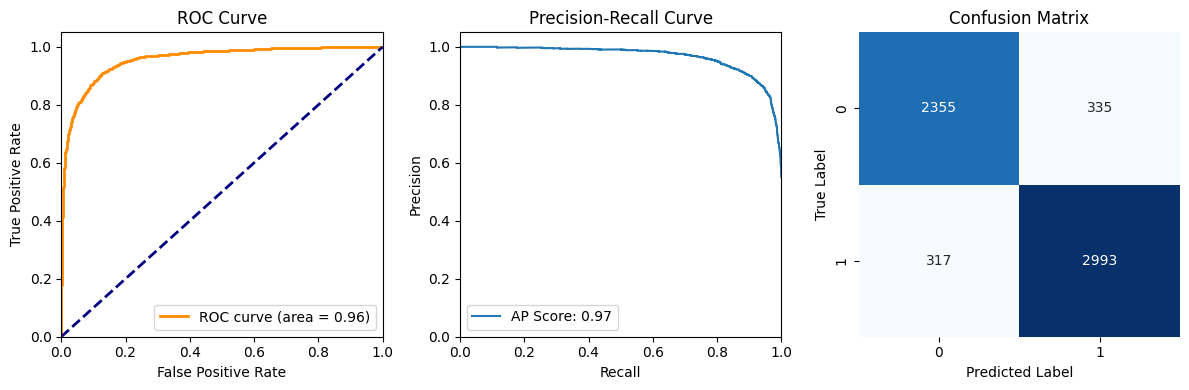

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only on training data to handle class imbalance
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize LDA using the LSQR solver
lda = LinearDiscriminantAnalysis(solver='lsqr')

# Train the LDA model on the resampled training data
lda_model = lda.fit(X_train_smote, y_train_smote)

evaluate_model(lda_model, X_train, y_train, X_test, y_test)


In [29]:
import numpy as np
import pandas as pd

# Fit the model
lda_model = lda.fit(X_train_smote, y_train_smote)

# Retrieve the coefficients or scalings
if len(np.unique(y_train_smote)) == 2:
    # Binary classification
    coefficients = lda_model.coef_[0]
else:
    # Multi-class classification
    coefficients = lda_model.scalings_

# Map coefficients to feature names if you have a DataFrame
feature_names = X_train_smote.columns  # Assuming X_train_smote is a DataFrame
feature_importance = pd.DataFrame(coefficients, index=feature_names, columns=['Importance'])

# Sort the features by their importance (not absolute value)
feature_importance_sorted = feature_importance.sort_values(by='Importance', ascending=False)

# Get the top 3 and bottom 3 features
top_three_features = feature_importance_sorted.head(3)
bottom_three_features = feature_importance_sorted.tail(3)

# Print the top 3 features
print("Top 3 Important Features:")
print(top_three_features, "\n")

# Print the bottom 3 features
print("Bottom 3 Important Features:")
print(bottom_three_features)


Top 3 Important Features:
                                 Importance
Seat_comfort_extremely poor        7.627710
Seat_comfort_excellent             4.149669
Onboard_entertainment_excellent    2.686343 

Bottom 3 Important Features:
                                   Importance
Catering_extremely poor             -2.859018
Onlinebooking_Ease_extremely poor   -4.111732
Online_boarding_extremely poor      -5.868256


Linear SVM

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define a range of C values to explore
param_grid = {'C': [0.1, 1, 10, 100, 1000]}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, refit=True, verbose=3, cv=5)

# Perform the grid search on the resampled data
grid_search.fit(X_train_smote, y_train_smote)

# Print out the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Retrieve the best model
best_linear_svm_model = grid_search.best_estimator_

# Evaluate the best model on the original training set
print("\nEvaluation on the resampled training set:")
train_predictions = best_linear_svm_model.predict(X_train_smote)
print(classification_report(y_train_smote, train_predictions))

# Evaluate the best model on the test set
print("\nEvaluation on the test set:")
test_predictions = best_linear_svm_model.predict(X_test)
print(classification_report(y_test, test_predictions))

# Print accuracy scores
print("Training Accuracy: {:.2f}%".format(accuracy_score(y_train_smote, train_predictions) * 100))
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test, test_predictions) * 100))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .............................C=0.1;, score=0.888 total time=  11.0s
[CV 2/5] END .............................C=0.1;, score=0.896 total time=  11.3s
[CV 3/5] END .............................C=0.1;, score=0.906 total time=  10.9s
[CV 4/5] END .............................C=0.1;, score=0.899 total time=  10.4s
[CV 5/5] END .............................C=0.1;, score=0.909 total time=  12.8s
[CV 1/5] END ...............................C=1;, score=0.890 total time=  21.6s
[CV 2/5] END ...............................C=1;, score=0.896 total time=  21.9s
[CV 3/5] END ...............................C=1;, score=0.907 total time=  22.2s
[CV 4/5] END ...............................C=1;, score=0.897 total time=  20.8s
[CV 5/5] END ...............................C=1;, score=0.906 total time=  25.6s
[CV 1/5] END ..............................C=10;, score=0.889 total time= 1.9min
[CV 2/5] END ..............................C=10;,

Logistic Regression

In [228]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty norm
    'solver': ['liblinear', 'saga']  # Solver for optimization
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=3000)

# Set up the grid search with cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_log_reg_model = grid_search.best_estimator_

# Evaluate the model using the evaluate_model function
evaluate_model(best_log_reg_model, X_train_smote, y_train_smote, X_test, y_test)


RBF SVM

In [25]:
from sklearn.svm import SVC

# Train the SVC model with an RBF kernel
rbf_svm = SVC(kernel='rbf', gamma='scale', C=1)
rbf_svm_model = rbf_svm.fit(X_train, y_train)

# Evaluate the model using the evaluate_model function
evaluate_model(rbf_svm_model, X_train, y_train, X_test, y_test)


Gradient-boosted Trees

Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95


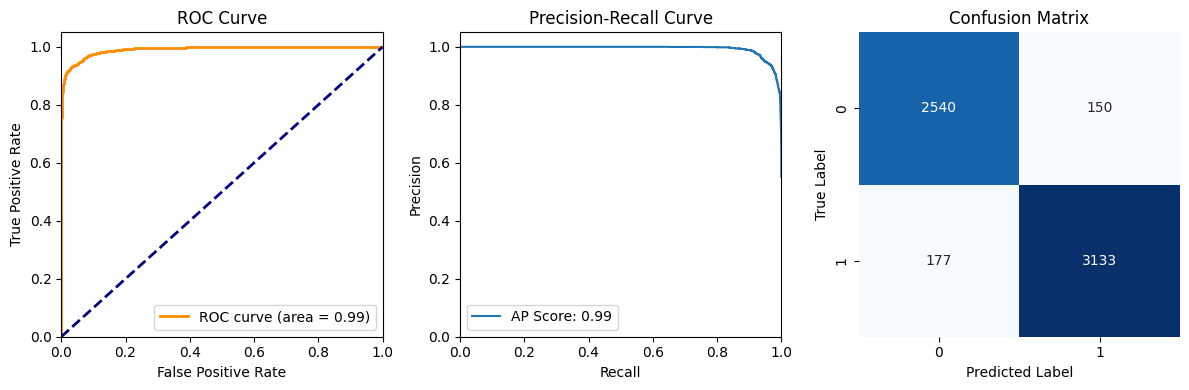

In [177]:
#Random Search:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the hyperparameters and their ranges
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the classifier
gbc = GradientBoostingClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gbc, param_distributions=param_dist, 
                                   n_iter=10, cv=5, n_jobs=-1, random_state=42)

# Perform Random Search
random_search.fit(X_train, y_train)

# Use the best estimator to evaluate model
best_gbc = random_search.best_estimator_
evaluate_model(best_gbc, X_train, y_train, X_test, y_test)


In [178]:
#Bayesian Search:
from skopt import BayesSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the hyperparameter space
search_space = {
    'n_estimators': (100, 500),
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'max_depth': (3, 7),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4)
}

# Initialize the classifier
gbc = GradientBoostingClassifier()

# Initialize BayesSearchCV
bayes_search = BayesSearchCV(estimator=gbc, search_spaces=search_space, 
                             n_iter=32, cv=5, n_jobs=-1, random_state=42)

# Perform Bayesian Search
bayes_search.fit(X_train, y_train)

# Use the best estimator to evaluate model
best_gbc = bayes_search.best_estimator_
evaluate_model(best_gbc, X_train, y_train, X_test, y_test)
